##Clustering:
###It is the processing of finding groups in data which are very different from each other.
###For example, in the data of animals we form groups of cats, dogs, birds which are very different from each other.
###One of the methods of clustering is to find the distance between the points which the objects represent in some n dimensional space. Euclidean distance is one such measure, where we measure the geometric distance between two points in a finite n-dimensional space. This distance will tell us how close or 'similar' these objects are to each other.

In [1]:
#To find Euclidean distance between two objects whose coordinates are mentioned.
from scipy.spatial import distance
a=[1,2,3]         #Two objects a and b whose coordinates are represented as lists
b=[4,5,6]
print("Distance between objects a and b=",distance.euclidean(a,b))

Distance between objects a and b= 5.196152422706632


###Similarly we have the manhattan Distance and so on. There exists a generalization called the Minkowski distance which is shown as follows:
$d(i,j)=((x_1-y_1)^p+(x_2-y_2)^p+.....+(x_n-y_n)^p)^(1/p)$
###where objects i and j are represented by the coordinates $(x_1,x_2,x_3....,x_n)$ and $(y_1,y_2,y_3.....,y_n)$
###when p=1, we have the manhattan distance
###when p=2, we have the euclidean distance and so on.

In [2]:
#To find minkowski distance
print("Manhattan Distance between objects a and b=",distance.minkowski(a,b,1))
print("Euclidean Distance between objects a and b=",distance.minkowski(a,b,2))
print("Minkowski Distance(for p=3) between objects a and b=",distance.minkowski(a,b,3))

Manhattan Distance between objects a and b= 9.0
Euclidean Distance between objects a and b= 5.196152422706632
Minkowski Distance(for p=3) between objects a and b= 4.3267487109222245


###Lets consider the following dataset:
Person|Weight(kg)|Height(cm)
------|----------|----------
A|15|95
B|49|156
C|13|95
D|45|160
E|85|178
F|66|176
G|12|90
H|10|78

###Here the objects are identified by the letters A,B,C....,H. The distances between each pair of objects will form a symmetric matrix due to the symmetric property of distance i.e d(i,j)=d(j,i)


In [3]:
#To find the distance matrix for the given data
import pandas as pd
from scipy.spatial import distance_matrix as dm
objects=['A','B','C','D','E','F','G','H']
values=[[15,95],[49,156],[13,95],[45,160],[85,178],[66,176],[12,90],[10,78]]
df=pd.DataFrame(values,columns=['Weight(kg)','Height(cm)'],index=objects)
df

,Weight(kg),Height(cm)
A,15,95
B,49,156
C,13,95
D,45,160
E,85,178
F,66,176
G,12,90
H,10,78


In [4]:
#Now obtain the distance matrix
dist_mat=pd.DataFrame(dm(df.values,df.values),index=df.index,columns=df.index)
dist_mat.round(decimals=2)

,A,B,C,D,E,F,G,H
A,0.00,69.84,2.00,71.59,108.58,95.72,5.83,17.72
B,69.84,0.00,70.83,5.66,42.19,26.25,75.66,87.21
C,2.00,70.83,0.00,72.45,109.88,96.80,5.10,17.26
D,71.59,5.66,72.45,0.00,43.86,26.40,77.39,89.16
E,108.58,42.19,109.88,43.86,0.00,19.10,114.34,125.00
F,95.72,26.25,96.80,26.40,19.10,0.00,101.55,112.87
G,5.83,75.66,5.10,77.39,114.34,101.55,0.00,12.17
H,17.72,87.21,17.26,89.16,125.00,112.87,12.17,0.00


##K Means Clustering:
###It is the porcess of dividing n objects into k clusters which are as compact and dissimilar to each other as possible. Here k is an input parameter.

In [9]:
#Lets perform k-means clustering on two objects
objects=[i for i in range(1,8)]
values=[[1.0,1.0],[1.5,2.0],[3.0,4.0],[5.0,7.0],[3.5,5.0],[4.5,5.0],[3.5,4.5]]
df=pd.DataFrame(values,columns=['Variable_1','Variable_2'],index=objects)
df

,Variable_1,Variable_2
1,1.0,1.0
2,1.5,2.0
3,3.0,4.0
4,5.0,7.0
5,3.5,5.0
6,4.5,5.0
7,3.5,4.5


<Figure size 360x360 with 0 Axes>

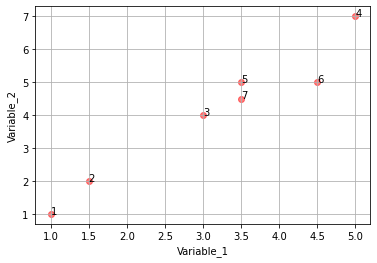

In [29]:
#Visualize the relationship between the two variables
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,5))
x=df['Variable_1']
y=df['Variable_2']
fig,ax=plt.subplots()
ax.scatter(x,y,marker='o',color='r',alpha=.5)
plt.grid()
plt.xlabel('Variable_1')
plt.ylabel('Variable_2')
for i in range(1,8):
  ax.annotate(str(i),(x[i],y[i]))
plt.show()

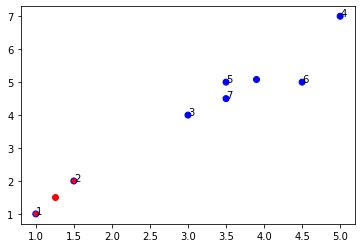

In [38]:
#Preparing K-Means Clustering Model
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2)
kmeans.fit(df)
labels=kmeans.predict(df)   #The cluster to which an object belongs to
centroid=kmeans.cluster_centers_    #The centroids of the clusters
colmap={1:'r',2:'b'}
colors=map(lambda x:colmap[x+1],labels)
color1=list(colors)
fig,ax=plt.subplots()
ax.scatter(x,y,color=color1,edgecolor='b')
for i,txt in enumerate(centroid):
  plt.scatter(*txt,color=colmap[i+1])
for i in range(1,8):
  ax.annotate(str(i),(x[i],y[i]))
plt.show()
#Thus we have obtained two distinct clusters